<a href="https://colab.research.google.com/github/SterlingHayden/Gradient-Descent-Methods/blob/main/NewtonsMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 14: Newton's Method for Unconstrained Nonlinear Programs

---

Students will be skilled at

1. implementing and applying Newton's method to solve unconstrained nonlinear programming problems

## Importing numpy and matplotlib

In [ ]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as pt

## Example 1

$$\min_{x_1,x_2} f(x_1,x_2) = (x_1 - 3)^2 + 0.05(x_2 - 1)^4 - x_1x_2$$

### Objective Function

In [ ]:
# Write a Python function "f" to evaluate the objective
def f(sol):
  return (sol[0] - 3)**2 + 0.05*(sol[1] - 1)**4 - sol[0]*sol[1]

### Gradient

$$\nabla f (x_1,x_2) = \left[\begin{array}{r} 2(x_1 - 3) - x_2 \\ 0.2(x_2 - 1)^3 -x_1 \end{array}\right]$$

In [ ]:
# Write a Python function "f_gradient" to evaluate the gradient
# The function should output a vector (numpy.ndarray) with two elements
def f_gradient(sol):
  return np.array([2*(sol[0] - 3) - sol[1], 0.2*((sol[1] - 1)**3) - sol[0]])

#### Verification

Use the following values to verify your gradient function:
* $\nabla f(1,0) = \left[\begin{array}{r}-4 \\ -1.2 \end{array}\right]$
* $\nabla f(-1,2) = \left[\begin{array}{r}-10 \\ 1.2 \end{array}\right]$
* $\nabla f(-2,-2) = \left[\begin{array}{r}-8 \\ -3.4 \end{array}\right]$
* $\nabla f(0,0) = \left[\begin{array}{r}-6 \\ -0.2 \end{array}\right]$

In [ ]:
print(f_gradient(np.array([1,0])))
print(f_gradient(np.array([-1,2])))
print(f_gradient(np.array([-2,-2])))
print(f_gradient(np.array([0,0])))

[-4.  -1.2]
[-10.    1.2]
[-8.  -3.4]
[-6.  -0.2]


### Hessian

$$\nabla^2 f(x_1,x_2) = \left[\begin{array}{rr} 2 & -1 \\ -1 & 0.6(x_2 - 1)^2 \end{array} \right]$$

In [ ]:
# Write a Python function "f_hessian" to evaluate the gradient
# The function should output a 2x2 numpy.ndarray
def f_hessian(sol):
  return np.array([[2,-1],[-1,0.6*(sol[1]-1)**2]])


#### Verification

Use the following values to verify your gradient function:
* $\nabla^2 f(1,0) = \left[\begin{array}{rr}2 & -1 \\ -1 &  0.6 \end{array}\right]$
* $\nabla^2 f(-1,2) = \left[\begin{array}{rr}2 & -1 \\ -1 &  0.6 \end{array}\right]$
* $\nabla^2 f(-2,-2) = \left[\begin{array}{rr}2 & -1 \\ -1 &  5.4\end{array}\right]$
* $\nabla^2 f(0,0) = \left[\begin{array}{rr}2 & -1 \\ -1 &  0.6 \end{array}\right]$

In [ ]:
print(f_hessian(np.array([1,0])))
print(f_hessian(np.array([-1,2])))
print(f_hessian(np.array([-2,-2])))
print(f_hessian(np.array([0,0])))

[[ 2.  -1. ]
 [-1.   0.6]]
[[ 2.  -1. ]
 [-1.   0.6]]
[[ 2.  -1. ]
 [-1.   5.4]]
[[ 2.  -1. ]
 [-1.   0.6]]


### Compute the Newton Direction

In Newton's method, we perform the update

$\mathbf{x}^{(k+1)} \leftarrow \mathbf{x}^{(k)} + t^{(k)}\mathbf{d}^{(k)}$

where $\mathbf{x}^{(k)}$ is the solution in iteration $k$, $t^{(k)}$ is the step size in iteration $k$, and $\mathbf{d}^{(k)} = -\left[\nabla^2 f(\mathbf{x}^{(k)}) \right]^{-1} \nabla f(\mathbf{x}^{(k)})$ is the search direction in iteration $k$.

For example, if $\mathbf{x}^{(k)} = \left[\begin{array}{r} -1 \\ -2 \end{array}\right]$, we can compute $\mathbf{d}^{(k)}$ as follows:

In [ ]:
sol = np.array([-1,-2])
H = f_hessian(sol)
print(H)
d = -LA.inv(H) @ f_gradient(sol)
print(d)

[[ 2.  -1. ]
 [-1.   5.4]]
[3.75510204 1.51020408]


Alternatively, we can compute $\mathbf{d}^{(k)}$ by solving the following linear system of equations:

$$\nabla^2 f(\mathbf{x}^{(k)})\mathbf{d}^{(k)} = - \nabla f(\mathbf{x}^{(k)})$$

In [ ]:
d = LA.solve(H, -f_gradient(sol))
print(d)

[3.75510204 1.51020408]


**Question**: Do you think this way requires more or less computational effort than using the matrix inverse?

In [ ]:
# Write a Python function "newton_dir" to compute the Newton direction
# The function should output a vector (numpy.ndarray) with two elements
def newton_dir(sol, ):
  H = f_hessian(sol)
  d = LA.solve(H, -f_gradient(sol))
  return d

In [ ]:
print(newton_dir(np.array([-1,-2])))

[3.75510204 1.51020408]


### Implement Newton's Method

In [ ]:
# Write a function that performs Newton's method to minimize the function f
# Use the following inputs
#   initial_sol = a numpy.ndarray that contains the starting solution
#   step_size = a scalar that indicates the (fixed) step size t for each step
#   eta = the upper bound on LA.norm(f_gradient(sol))
#         required to trigger the stopping condition
#   max_iter = a maximum number of iterations
def newtonmethod_fixedstep(initial_sol, step_size, eta, max_iter):
  sol = initial_sol
  sol_history = [sol]     # (optional) will track the solutions we visit
  obj_history = [f(sol)]  # (optional) will track the objective values
  num_iter = 0
  while LA.norm(f_gradient(sol)) > eta and num_iter < max_iter:
    d = newton_dir(sol)
    sol = sol + step_size * d
    sol_history.append(sol)
    obj_history.append(f(sol))
    num_iter += 1

  return sol, num_iter, sol_history, obj_history

In [ ]:
# Test it starting from [-1,-2]
initial_sol = np.array([-1,-2])
sol, num_iter, sol_history, obj_history = newtonmethod_fixedstep(initial_sol, 1, 0.000001, 100)
print(sol)
print(num_iter)

[4.95789333 3.91578667]
5


The algorithm converged in relatively few iterations!

Text(0, 0.5, '$x_2$')

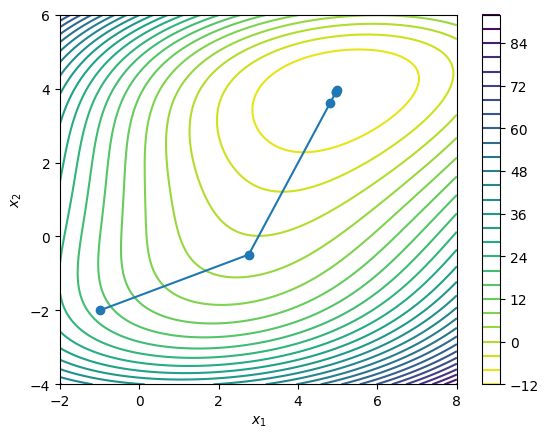

In [ ]:
# Plot the results
xmesh, ymesh = np.mgrid[-2:8:500j, -4:6:500j]
fmesh = f(np.array([xmesh, ymesh]))
pt.contour(xmesh,ymesh,fmesh, 30, cmap = pt.cm.viridis_r)
iteration_history = np.array(sol_history)
pt.plot(iteration_history.T[0], iteration_history.T[1], "o-")
#pt.arrow(-1,-3,0.05*5,0.05*11.8, head_width = 0.2, color = 'blue')
#pt.arrow(-1,-3,0.05*3.2857,0.05*1.5714, head_width = 0.2, color = 'red')
pt.xlim([-2,8])
pt.ylim([-4,6])
pt.colorbar()
pt.xlabel('$x_1$')
pt.ylabel('$x_2$')

## Example 2

$$\begin{align}\min_{x_1,x_2,x_3} g(x_1,x_2,x_2) = && & x_1^4 + 2x_1^2 - 4x_1 \\ &&& + x_2^2 -2x_2 \\ &&& +x_3^4 + 3x_3^2 -5x_3 \\ &&& -x_1x_2 - 2x_2x_3\end{align} $$

In [ ]:
# Write a Python function "g" to evaluate the objective
def g(sol):
  return (sol[0]**4 + 2*(sol[0]**2) - 4*sol[0]
          +sol[1]**2 - 2*sol[1]
          +sol[2]**4 + 3*(sol[2]**2) - 5*sol[2]
          -sol[0]*sol[1] - 2*sol[1]*sol[2])

In [ ]:
# Write a Python function "g_gradient" to evaluate the gradient
def g_gradient(sol):
  return np.array([4*(sol[0]**3) + 4*sol[0] - 4 - sol[1],
                   2*sol[1] - 2 - sol[0] - 2*sol[2],
                   4*(sol[2]**3) + 6*sol[2] - 5 - 2*sol[1]])

In [ ]:
# Write a Python function "g_hessian" to evaluate the gradient
def g_hessian(sol):
  return np.array([[12*(sol[0]**2) + 4, -1, 0],[-1, 2, -2],[0, -2, 12*(sol[2]**2) + 6]])

In [ ]:
# Write a Python function "newton_dir" to compute the Newton direction
def newton_dir(sol):
  H = g_hessian(sol)
  d = LA.solve(H, -g_gradient(sol))
  return d

In [ ]:
# Write code to solve this example by Newton's Method
def newtonmethod_fixedstep(initial_sol, step_size, eta, max_iter):
  sol = initial_sol
  sol_history = [sol]     # (optional) will track the solutions we visit
  obj_history = [g(sol)]  # (optional) will track the objective values
  num_iter = 0
  while LA.norm(g_gradient(sol)) > eta and num_iter < max_iter:
    d = newton_dir(sol)
    sol = sol + step_size * d
    sol_history.append(sol)
    obj_history.append(g(sol))
    num_iter += 1

  return sol, num_iter, sol_history, obj_history

In [ ]:
# Test it starting from [-1,-1, -1]
initial_sol = np.array([-1,-1,-1])
sol, num_iter, sol_history, obj_history = newtonmethod_fixedstep(initial_sol,1,0.000001,100)
print(sol)
print(num_iter)
print(obj_history[-1])

[0.89448139 2.44061292 0.99337222]
7
-8.32691262148852


### Verify using cvxpy

In [ ]:
import cvxpy as cp

In [ ]:
Q = np.array([[4, -1, 0],[-1, 2, -2],[0, -2, 6]])
p = np.array([-4, -2, -5])
print(Q)
x = cp.Variable(3)
obj = cp.Minimize((0.5)*cp.quad_form(x,Q) + p.T @ x + x[0]**4 + x[2]**4)
prob = cp.Problem(obj)
prob.solve()
print("status: ", prob.status)
print("optimal obj val: ", prob.value)
print("optimal solution: ", x.value)

[[ 4 -1  0]
 [-1  2 -2]
 [ 0 -2  6]]
status:  optimal
optimal obj val:  -8.326912619680082
optimal solution:  [0.89447756 2.44059691 0.99335727]
